In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds=pd.read_csv('C:\\Users\\Admin\\excel\\Naive-Bayes-Classification-Data.csv')

In [5]:
ds.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [7]:
ds.tail()

,glucose,bloodpressure,diabetes
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1
994,45,82,0


In [9]:
ds.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [13]:
ds.isna().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

In [53]:
ds['diabetes'].value_counts()

diabetes
1    498
0    497
Name: count, dtype: int64

In [55]:
ds.corr()

,glucose,bloodpressure,diabetes
glucose,1.000000,-0.164553,0.031585
bloodpressure,-0.164553,1.000000,-0.808303
diabetes,0.031585,-0.808303,1.000000


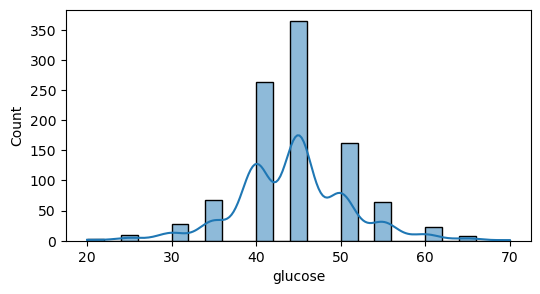

In [63]:
plt.figure(figsize=(6,3))
sns.histplot(ds['glucose'],kde=True)
plt.show()

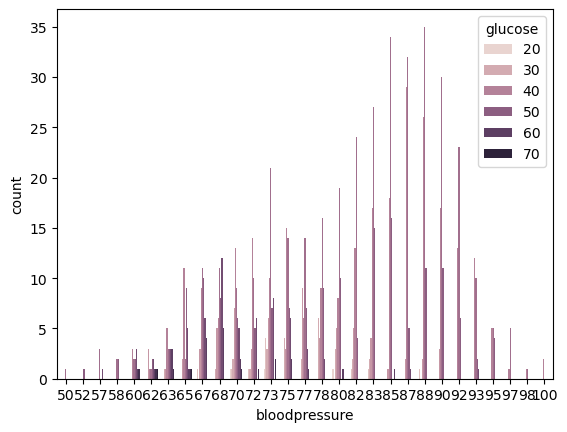

In [65]:
sns.countplot(data = ds, x ='bloodpressure',hue= 'glucose')
plt.show()

In [17]:
X = ds[['glucose', 'bloodpressure']]  # Features
y = ds['diabetes']  # Target

# Check the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (995, 2)
y shape: (995,)


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [23]:
gnb.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred=gnb.predict(X_test)
print(y_pred)

[1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1
 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 1 0]


In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [43]:
print('Accuracy Score :',metrics.accuracy_score(y_test,y_pred))

Accuracy Score : 0.9331103678929766


In [67]:
cm=np.array(confusion_matrix(y_test,y_pred))
cm

array([[130,  10],
       [ 10, 149]], dtype=int64)